In [88]:
from sampling import langevin_step as step
import matplotlib.pyplot as plt
import torch
def normal_distribution_score(x: torch.Tensor):
    return -x
alpha = 0.01
d = 2
K = 10000
x = torch.rand(2, 1000) 
samples = []
for i in range(K):
    if i == 0 or (i+1) % 20 == 0:
        samples.append(x)
    x = step(x, normal_distribution_score, alpha)

501


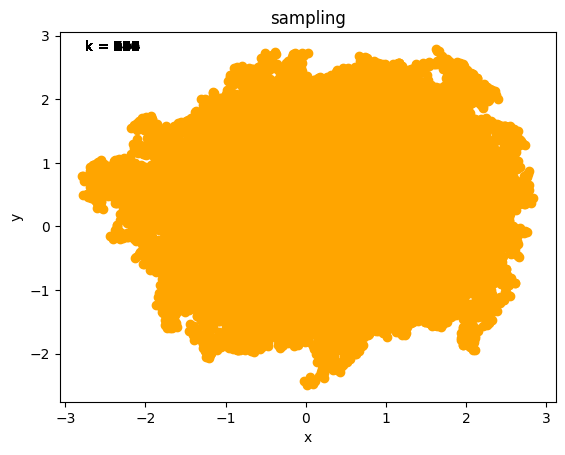

In [89]:
fig = plt.figure()
ax = fig.add_subplot()
artists = []
print(len(samples))
for i in range(len(samples)):
    _x = samples[i][0, :]
    _y = samples[i][1, :]
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("sampling")
    artist = []
    artist.append(ax.scatter(_x, _y, color="orange"))
    artist.append(ax.text(0.05, 0.95, f"k = {i}", transform=ax.transAxes))
    artists.append(artist)

In [90]:
import matplotlib.animation as animation
anim = animation.ArtistAnimation(fig, artists, interval=11, repeat=False)
# Save animation
anim.save("sampling.gif", writer="pillow")  